# Udacity WeRateDogs Data Wrangling Project

## Pamoli Dutta

## Introduction:
In this project, using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. <br/>
The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

## Gathering the data:
The project instruction illustrates te proedures to collate the required datasets. So first, we'll gather all available data.

In [97]:
#Importing necessary libraries
import tweepy 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Inserting consumer and access credentials
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [155]:
#Loading the given archive data into a dataframe
archive_data=pd.read_csv("twitter-archive-enhanced.csv")

#Looking at a snapshot of the dataset
archive_data.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

In [156]:
#Extracting the twitter ids required to query data from Teitter's database
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

2356

In [152]:
#Adding each tweet to a new line in 'tweet_json.txt'
with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for i in tweet_ids:
        try:
            t = api.get_status(i, tweet_mode='extended')
            json.dump(t._json, file)
            file.write('\n')
        except:
            continue

In [157]:
#Reading 'tweet_json.txt'
tweet = []

file=open('tweet_json.txt', "r")

for i in file:
    try:
        t = json.loads(i)
        tweet.append(t)
    except:
        continue
        
file.close()

In [158]:
#Selecting only the required variables and putting it into a dataframe
additional_data = pd.DataFrame()

additional_data['tweet_id'] = list(map(lambda t: t['id'], tweet))
additional_data['retweets'] = list(map(lambda t: t['retweet_count'], tweet))
additional_data['favorites'] = list(map(lambda t: t['favorite_count'], tweet))

In [159]:
#Looking at a snapshot of the dataset
additional_data.head(10)

tweet_id  retweets  favorites
0  892420643555336193      8321      38043
1  892177421306343426      6148      32666
2  891815181378084864      4068      24580
3  891689557279858688      8461      41403
4  891327558926688256      9162      39572
5  891087950875897856      3046      19871
6  890971913173991426      2019      11617
7  890729181411237888     18464      64203
8  890609185150312448      4188      27313
9  890240255349198849      7219      31327

In [160]:
#Downloading 'image-predictions.tsv' file programmatically using requests library
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

filename='image-predictions.tsv'

with open( filename, 'wb') as f:
        f.write(r.content)

In [161]:
#Loading image predictions data into a dataframe
image_pred_data= pd.read_table('image-predictions.tsv')

#Looking into a snapshot of the data
image_pred_data.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

## Assesing the data:
Now that we have all the data, we can go ahead and assess the quality and other aspects of the data.

In [162]:
#Looking into basic properties of the archive data
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [163]:
#Looking into basic properties of the additional data
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 3 columns):
tweet_id     6341 non-null int64
retweets     6341 non-null int64
favorites    6341 non-null int64
dtypes: int64(3)
memory usage: 148.7 KB


In [164]:
#Looking into basic properties of the image predictions data
image_pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [165]:
#Checking for how many ids the image prediction data are missing
len(archive_data[~archive_data['tweet_id'].isin(image_pred_data['tweet_id'])])

281

In [166]:
#Checking for how many ids the additional data are missing
len(archive_data[~archive_data['tweet_id'].isin(additional_data['tweet_id'])])

16

In [167]:
#We've noticed, in the snapshot of archive data, some of the dog names are listed as 'none', 
#which can't be a valid dog name.
#So, next we'll check the list of all names to see how many such instances are there.
list(archive_data['name'].unique())

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

Apart from 'none', we see names like 'a','an','the','quite','not','one','just','my','his','this','all' which seem unusual.

Next, we'll list down all the issues we primarily found in these datasets.

### **Quality issues:**<br/>
- Dog names contain invalid names.
- 'Tweet_id's are stored as integers, ids are more suited to be strings.
- The values for 'in_reply_to_status_id','in_reply_to_user_id' variables are mostly NaN.
- The 'rating_numerator' and 'rating_denominator' are stored as integers, but rating can take any value and hence should be a float.
- All 'timestamp' variables should be a datetime object, it is stored as a string.
- Retweets and favourites are supposed to be discreet values which are stored as floats here.

### **Tidiness issues:**

- In archive data, four columns have been used to represent dog type when it can be summarized in a single column.
- Two variables are defined for ratings, which can be combined into one.
- The image prediction and additional info can be joined to the original table. There is no need for three seperate tables.
- The columns that are not useful for analysis should be removed.

Now, we'll resolve the issues one by one as follows. Before that, we'll first make copies of each of the datasets.

In [168]:
archive_copy=archive_data.copy()
additional_copy=additional_data.copy()
image_copy=image_pred_data.copy()

- **Dog names contain invalid names.**

**Define:** Replace all invalid dog names by 'NaN'

**Code:**

In [170]:
names=list(archive_copy['name'])
stopwords=['a','an','the','quite','not','one','just','my','his','this','all','None' ]

In [171]:
names_new=['NaN' if i in stopwords else i for i in names]

**Test:**

In [172]:
names_new

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'NaN',
 'Jax',
 'NaN',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'NaN',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'NaN',
 'NaN',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'NaN',
 'Waffles',
 'NaN',
 'Jimbo',
 'Maisey',
 'NaN',
 'Lilly',
 'NaN',
 'Earl',
 'Lola',
 'Kevin',
 'NaN',
 'NaN',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'NaN',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'NaN',
 'NaN',
 'Elliot',
 'Louis',
 'NaN',
 'Bella',
 'Jesse',
 'NaN',
 'Romeo',
 'NaN',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'NaN',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'NaN',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'NaN',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'NaN',
 'NaN',
 'Cash',
 'Coco',
 'Jed',
 'NaN',
 'Sebastian',
 'Walter',
 'NaN',
 'Sierra',
 'Sierra',
 'NaN',
 'NaN',
 'NaN',
 'Monkey',
 'NaN

The new variable doesn't contain the invalid names anymore.

In [173]:
archive_copy['name']=names_new

- **'Tweet_id's are stored as integers, ids are more suited to be strings.**

**Define:** Convert all the ids from integers to srings.

**Code:**

In [174]:
#Archive table
archive_copy["tweet_id"] = archive_copy["tweet_id"].astype(str)
archive_copy["in_reply_to_status_id"] = archive_copy["in_reply_to_status_id"].astype(str)
archive_copy["in_reply_to_user_id"] = archive_copy["in_reply_to_user_id"].astype(str)
archive_copy["retweeted_status_id"] = archive_copy["retweeted_status_id"].astype(str)
archive_copy["retweeted_status_user_id"] = archive_copy["retweeted_status_user_id"].astype(str)

#Additional table
additional_copy["tweet_id"] = additional_copy["tweet_id"].astype(str)

#Image predictions table
image_copy["tweet_id"] = image_copy["tweet_id"].astype(str)

**Test:**

In [175]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


In [176]:
additional_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 3 columns):
tweet_id     6341 non-null object
retweets     6341 non-null int64
favorites    6341 non-null int64
dtypes: int64(2), object(1)
memory usage: 123.9+ KB


In [177]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


In every table, 'id's are now strings.

- The values for 'in_reply_to_status_id','in_reply_to_user_id' variables are mostly NaN.

Now, these ids are unrecoverable. Let's check what percentage of data is NaN. 

In [178]:
archive_copy["in_reply_to_status_id"].value_counts()[[0]]

nan    2278
Name: in_reply_to_status_id, dtype: int64

In [179]:
archive_copy["in_reply_to_user_id"].value_counts()[[0]]

nan    2278
Name: in_reply_to_user_id, dtype: int64

In [180]:
archive_copy["retweeted_status_id"].value_counts()[[0]]

nan    2175
Name: retweeted_status_id, dtype: int64

In [181]:
archive_copy["retweeted_status_user_id"].value_counts()[[0]]

nan    2175
Name: retweeted_status_user_id, dtype: int64

A huge percentage of data is missing for these variables. So these variables variables are not of much use in the analysis. We'll drop these in the tidiness section. 

- The 'rating_numerator' and 'rating_denominator' are stored as integers, but rating can take any value and hence should be a float.

**Define:** Convert the ratings from integers to floats.

**Code:**

In [182]:
archive_copy["rating_numerator"] = archive_copy["rating_numerator"].astype(float)
archive_copy["rating_denominator"] = archive_copy["rating_denominator"].astype(float)

**Test:**

In [183]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), objec

The rating variables are converted to float.

- All 'timestamp' variables should be a datetime object, it is stored as a string.

**Define:** Convert timestamps to a datetime object.

**Code:**

In [184]:
archive_copy["timestamp"] = pd.to_datetime(archive_copy["timestamp"])
archive_copy["retweeted_status_timestamp"] = pd.to_datetime(archive_copy["retweeted_status_timestamp"])

**Test:**

In [185]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: d

The timestamps are converted to datetime objects.

- Retweets and favourites are supposed to be discreet values which are stored as floats here.

**Define:** Convert retweets and favourites to integers.

**Code:**

In [186]:
additional_copy["retweets"] = additional_copy["retweets"].astype(float)
additional_copy["favorites"] = additional_copy["favorites"].astype(float)

**Test:**

In [187]:
additional_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 3 columns):
tweet_id     6341 non-null object
retweets     6341 non-null float64
favorites    6341 non-null float64
dtypes: float64(2), object(1)
memory usage: 123.9+ KB


Favorites and rerweets are converted to floats.

- In archive data, four columns have been used to represent dog type when it can be summarized in a single column.

First, let's look at all the all available combinations.

In [188]:
archive_copy[["doggo","floofer","pupper","puppo"]].drop_duplicates()

doggo  floofer  pupper  puppo
0     None     None    None   None
9    doggo     None    None   None
12    None     None    None  puppo
29    None     None  pupper   None
46    None  floofer    None   None
191  doggo     None    None  puppo
200  doggo  floofer    None   None
460  doggo     None  pupper   None

**Define:** Create a dictionary containing the vales of old columns and the new column. Then based on that, replace the four variables in the dataset by a single variable.

In [189]:
#Create one combined variable
archive_copy["stage"]=archive_copy["doggo"]+archive_copy["floofer"]+archive_copy["pupper"]+archive_copy["puppo"]

In [190]:
#Finding all possible different values
archive_copy["stage"].drop_duplicates()

0          NoneNoneNoneNone
9         doggoNoneNoneNone
12        NoneNoneNonepuppo
29       NoneNonepupperNone
46      NoneflooferNoneNone
191      doggoNoneNonepuppo
200    doggoflooferNoneNone
460     doggoNonepupperNone
Name: stage, dtype: object

In [191]:
#Creating a dictionary
stage_dict={"NoneNoneNoneNone":"None","doggoNoneNoneNone":"Doggo","NoneNoneNonepuppo":"Puppo","NoneNonepupperNone":"Pupper","NoneflooferNoneNone":"Floofer",
           "doggoNoneNonepuppo":"Doggo/Puppo","doggoflooferNoneNone":"Doggo/Floofer","doggoNonepupperNone":"Doggo/Pupper"}

In [192]:
#Replacing the combined variable by the new variable and dropping the four original variables
archive_copy=archive_copy.replace({"stage": stage_dict})
archive_copy=archive_copy.drop(["doggo","floofer","pupper","puppo"],axis=1)

**Test:**

In [193]:
archive_copy["stage"].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo/Puppo',
       'Doggo/Floofer', 'Doggo/Pupper'], dtype=object)

In [194]:
archive_copy.head(2)

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0  892420643555336193                   nan                 nan   
1  892177421306343426                   nan                 nan   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   

                                                text retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                 nan   
1  This is Tilly. She's just checking pup on you....                 nan   

  retweeted_status_user_id retweeted_status_timestamp  \
0                      nan                        NaT   
1                      nan                        NaT   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   

   rating_denominator     name stage  
0                10.0  Phineas  None  
1                10.0    Tilly  None

The four stage variables are replaced by one single variable.

- Two variables are defined for ratings, which can be combined into one.

**Define:** Create a new ratings variable and drop the numerator and denominator.

**Code:**

In [195]:
archive_copy["ratings"]=archive_copy["rating_numerator"]/archive_copy["rating_denominator"]

archive_copy=archive_copy.drop(["rating_numerator","rating_denominator"],axis=1)

**Test:**

In [196]:
archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'stage',
       'ratings'],
      dtype='object')

- The image prediction and additional info can be joined to the original table. There is no need for three seperate tables.

**Define:** Join the three tables based on 'tweet_id'. We would want only those ids for which all the data are present, so we would use inner join.

In [197]:
#Performing inner join
data = [archive_copy,additional_copy,image_copy]
cleaned_data = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), data)

In [198]:
cleaned_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'stage',
       'ratings', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

- The columns that are not useful for analysis should be removed.

**Define:** From the counts we saw the user_id and status_id columns have too less observations to use. So, we would drop them to make the data more compact.

**Code:**

In [199]:
cleaned_data=cleaned_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id'],axis=1)

**Test:**

In [200]:
cleaned_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'name', 'stage', 'ratings', 'retweets', 'favorites',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Storing the data:
Next we'll store the combined data in an excel file.

In [242]:
cleaned_data.to_csv("twitter_archive_master.csv")

Now we can use this clean dataset for analysis.

## Analysis and visualization of the data:

First we'll go ahead and look at the summary statistics of the data.

In [202]:
cleaned_data.describe()

ratings      retweets      favorites      img_num      p1_conf  \
count  5562.000000   5562.000000    5562.000000  5562.000000  5562.000000   
mean      1.152163   2941.757102    8936.883315     1.212154     0.594946   
std       3.446429   4918.822631   12934.993729     0.574226     0.270771   
min       0.000000     12.000000       0.000000     1.000000     0.044333   
25%       1.000000    652.000000    1942.250000     1.000000     0.366248   
50%       1.100000   1449.000000    4020.000000     1.000000     0.587764   
75%       1.200000   3423.000000   11398.750000     1.000000     0.844920   
max     177.600000  83694.000000  164338.000000     4.000000     1.000000   

            p2_conf       p3_conf  
count  5.562000e+03  5.562000e+03  
mean   1.356878e-01  6.050224e-02  
std    1.012919e-01  5.106017e-02  
min    1.011300e-08  1.740170e-10  
25%    5.407533e-02  1.605590e-02  
50%    1.197450e-01  4.945765e-02  
75%    1.966550e-01  9.276225e-02  
max    4.880140e-01  2.734190e-01

We see the metrics retweets and favorites have a huge variation in values.

We have dogs having four stages in the data. We can check the distribution of retweets, favorites and ratings by stages.

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

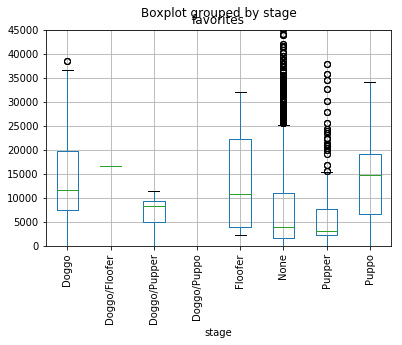

In [203]:
cleaned_data.boxplot("favorites",by="stage")
axes=plt.gca()
axes.set_ylim([0,45000])
plt.xticks(rotation=90)

The plot shows that Floofers have the most varied favorite counts, however, on an average, Puppos are favorited more. 

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

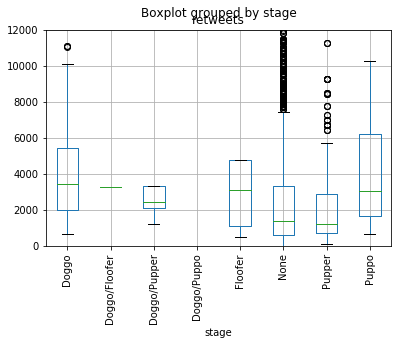

In [204]:
cleaned_data.boxplot("retweets",by="stage")
axes=plt.gca()
axes.set_ylim([0,12000])
plt.xticks(rotation=90)

The plot shows that Puppos have the most varied retweet counts, however, on an average, their retweet count is same as Floofer and Doggo. 

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

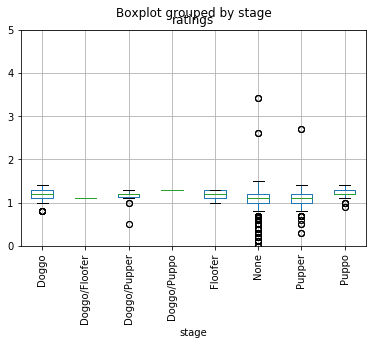

In [205]:
cleaned_data.boxplot("ratings",by="stage")
axes=plt.gca()
axes.set_ylim([0,5])
plt.xticks(rotation=90)

Doggo and Floofer appear to have better ratings than the other stages.

Next, we'll check whether the favorite and retweet counts have changed over the years.

In [233]:
cleaned_data["year_month"]=[i[:7] for i in cleaned_data['timestamp'].astype(str)]#cleaned_data.set_index('timestamp', inplace=True)
cleaned_data["year_month"]=pd.to_datetime(cleaned_data["year_month"])

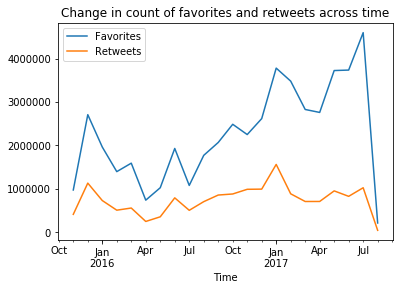

In [241]:
cleaned_data["favorites"].groupby("year_month").sum().plot(label='Favorites')
cleaned_data["retweets"].groupby("year_month").sum().plot(label='Retweets')
plt.xlabel("Time")
plt.title("Change in count of favorites and retweets across time")
plt.legend()  
plt.show()


Both retweets and favourite counts have increased over the years. However, the growth for favorites is steeper than that of retweets.

Both the plots show similar pattern and there might exist a correlation between these two. Next, we'll check for the corelation.

In [240]:
from scipy.stats.stats import pearsonr

pearsonr(cleaned_data["retweets"],cleaned_data["favorites"])

(0.849992361816287, 0.0)

As expected, there exists a high correlation between retweets and favorites count.